<a href="https://colab.research.google.com/github/Avanindra19/Avanindra19/blob/main/Netflix_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Let's begin with the case by downloading and reading the csv file
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv 

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 55.5MB/s]


In [2]:
import pandas as pd
df=pd.read_csv('/content/netflix.csv')

In [3]:
#by usinf .info() we can check the data types and the quality of given data 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#we can see three things:
#1)there are 8807 entries in the set 
#2)also some null values are present in the dataset in columns director,cast,date_added,country,rating,duration
#3)except of column release year ,which has datatype Int, every other columns' data type is object...

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#As we can see above,Columns such as cast,country and listed_in need to be unnested ....we will use the explode func to do the same

In [7]:
#lets begin with unnesting the listed_in coloumn and create a genre column 
#we will take the backup of the main dataframe


##Data Preprocessing

#unnesting listed_in column to create column genre
df1=df 
df1['genre']=df1['listed_in'].str.split(',')
df1=df1.explode('genre')
df1.drop('listed_in',axis=1,inplace=True)

def func(x):
  x=x.lstrip()
  return x
df1['genre']=df1['genre'].apply(func)

#unnesting country column to create column new_country
df1['new_country']=df['country'].str.split(',')
df1=df1.explode('new_country')
df1.drop('country',axis=1,inplace=True)

#finally ,unnesting cast column to create column new_cast
df1['new_cast']=df1['cast'].str.split(',')
df1=df1.explode('new_cast')
df1.drop('cast',axis=1,inplace=True)

In [8]:
df1.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,genre,new_country,new_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,United States,NaN
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,Ama Qamata
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,Khosi Ngema
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,Gail Mabalane
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,Thabang Molaba


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186399 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       186399 non-null  object
 1   type          186399 non-null  object
 2   title         186399 non-null  object
 3   director      135756 non-null  object
 4   date_added    186241 non-null  object
 5   release_year  186399 non-null  int64 
 6   rating        186332 non-null  object
 7   duration      186396 non-null  object
 8   description   186399 non-null  object
 9   genre         186399 non-null  object
 10  new_country   175254 non-null  object
 11  new_cast      184551 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [10]:
df_na=df1
#data sanity check 
df_na['date_added']=pd.to_datetime(df_na['date_added'])

In [11]:
df_na[df_na['date_added'].dt.year<df_na['release_year']]

,show_id,type,title,director,date_added,release_year,rating,duration,description,genre,new_country,new_cast
1551,s1552,TV Show,Hilda,NaN,2020-12-14,2021,TV-Y7,2 Seasons,"Fearless, free-spirited Hilda finds new friend...",Kids' TV,United Kingdom,Bella Ramsey
1551,s1552,TV Show,Hilda,NaN,2020-12-14,2021,TV-Y7,2 Seasons,"Fearless, free-spirited Hilda finds new friend...",Kids' TV,United Kingdom,Ameerah Falzon-Ojo
1551,s1552,TV Show,Hilda,NaN,2020-12-14,2021,TV-Y7,2 Seasons,"Fearless, free-spirited Hilda finds new friend...",Kids' TV,United Kingdom,Oliver Nelson
1551,s1552,TV Show,Hilda,NaN,2020-12-14,2021,TV-Y7,2 Seasons,"Fearless, free-spirited Hilda finds new friend...",Kids' TV,United Kingdom,Daisy Haggard
1551,s1552,TV Show,Hilda,NaN,2020-12-14,2021,TV-Y7,2 Seasons,"Fearless, free-spirited Hilda finds new friend...",Kids' TV,United Kingdom,Rasmus Hardiker
...,...,...,...,...,...,...,...,...,...,...,...,...
7112,s7113,TV Show,Jack Taylor,Stuart Orme,2013-03-31,2016,TV-MA,1 Season,Ken Bruen's bestselling crime novels leap to l...,TV Dramas,Ireland,Iain Glen
7112,s7113,TV Show,Jack Taylor,Stuart Orme,2013-03-31,2016,TV-MA,1 Season,Ken Bruen's bestselling crime novels leap to l...,TV Dramas,Ireland,Killian Scott
7112,s7113,TV Show,Jack Taylor,Stuart Orme,2013-03-31,2016,TV-MA,1 Season,Ken Bruen's bestselling crime novels leap to l...,TV Dramas,Ireland,Nora-Jane Noone
7112,s7113,TV Show,Jack Taylor,Stuart Orme,2013-03-31,2016,TV-MA,1 Season,Ken Bruen's bestselling crime novels leap to l...,TV Dramas,Ireland,Tara Breathnach


In [12]:
#as we can see above that few records have their date added year before their corresponding release year ...so we need to remove these records

In [13]:
df_na=df_na[df_na['date_added'].dt.year>=df_na['release_year']]

In [14]:
#imputing missing data
df_na['new_country']=df_na['new_country'].fillna(df_na['new_country'].mode())
df_na['director']=df_na['director'].fillna('No Director')
df_na['new_country']=df_na['new_country'].fillna('No Country')
df_na['new_cast']=df_na['new_cast'].fillna('No Cast')
df_na['duration']=df_na['duration'].fillna(df_na['duration'].str.split(expand=True)[0].mode())
df_na['rating']=df_na['rating'].fillna(df_na['rating'].mode())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [15]:
df_na.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,genre,new_country,new_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,United States,No Cast
1,s2,TV Show,Blood & Water,No Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,Ama Qamata
1,s2,TV Show,Blood & Water,No Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,Khosi Ngema
1,s2,TV Show,Blood & Water,No Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,Gail Mabalane
1,s2,TV Show,Blood & Water,No Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,Thabang Molaba


In [16]:
#Now we need to give recommendations about how to grow the business we will target few specific things 

In [17]:
#Netflix's revenue depends primarily on its subscribers ......
#The data provided to us can be used to provide business with insights about the content that the current subscribers like!!!
#It's important to keep in mind that I am assuming that the movies/Tv shows mentioned in the dataset are being liked by the subscribers.
#As it'll be difficult to provide recommendation to increase subscribers with the given data,I'll try to provide insights and recommendation to maintain pool of subscribers 

In [18]:
# Insight 1
dfx=df_na[df_na['type']=='TV Show'].groupby('genre')['new_country'].nunique()

In [19]:
dfx=dfx.reset_index()
dfx=dfx.sort_values('new_country',ascending=False)
dfx

,genre,new_country
5,International TV Shows,91
15,TV Dramas,84
3,Crime TV Shows,66
14,TV Comedies,58
6,Kids' TV,48
9,Romantic TV Shows,43
4,Docuseries,40
13,TV Action & Adventure,36
17,TV Mysteries,30
16,TV Horror,28


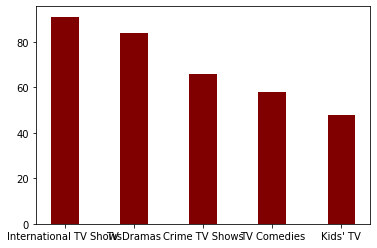

In [20]:
import matplotlib.pyplot as plt
dfx=dfx.head(5)
x=dfx['new_country'].values
y=dfx['genre'].values

plt.bar(y, x, color ='maroon',
        width = 0.4)
plt.show()

In [21]:
# From the above data we can clearly see the Top 5 Tv show genres being watched by the entire world

######***Recommendation 1
#Creating TV shows in these genres will increase subscriber retention 
#As shows made in these genres will be watched by subscribers from multiple countries,Content team will be able to attract more viewers/show thereby reducing costs of creating multiple shows for every region.


In [22]:
#Insight 2
#Similarly we can visualize the above case for movies as well
df_movies=df_na[df_na['type']=='Movie'].groupby('genre')['new_country'].nunique()

In [23]:
df_movies=df_movies.reset_index()
df_movies=df_movies.sort_values('new_country',ascending=False)
df_movies

,genre,new_country
11,International Movies,167
7,Dramas,154
6,Documentaries,108
10,Independent Movies,102
4,Comedies,99
0,Action & Adventure,92
19,Thrillers,85
15,Romantic Movies,74
2,Children & Family Movies,69
9,Horror Movies,68


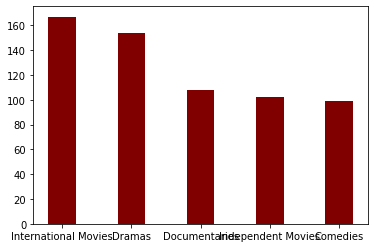

In [24]:
df_movies=df_movies.head(5)
x=df_movies['new_country'].values
y=df_movies['genre'].values

plt.bar(y, x, color ='maroon', width = 0.4)
plt.show()

In [25]:
##Recommendation 2
##More movies should be created in genres such as International Movies,Dramas,Documentaries,Independent Movies,Comedies

In [26]:
#Insight 3
df_sub=df_na[(df_na['type']=='TV Show')&(df_na['genre'].isin(['International TV Shows','TV Dramas','Crime TV Shows','TV Comedies',"Kids' TV"	]))][['title','rating','duration','genre']]
df_sub.drop_duplicates(keep='first',inplace=True)
df_sub=df_sub.groupby('genre')['rating'].value_counts()
df_sub

genre                   rating  
Crime TV Shows          TV-MA       348
                        TV-14       110
                        TV-PG         4
                        TV-Y7         3
                        NR            1
                        TV-G          1
International TV Shows  TV-MA       711
                        TV-14       471
                        TV-PG       134
                        TV-G         24
                        TV-Y7         3
                        NR            2
                        R             1
Kids' TV                TV-Y7       187
                        TV-Y        174
                        TV-G         43
                        TV-PG        41
                        TV-Y7-FV      1
TV Comedies             TV-MA       264
                        TV-14       137
                        TV-PG        58
                        TV-Y7        53
                        TV-G         28
                        TV-Y         28
TV Dram

In [27]:
#Recommendation 3
#The recommended TV ratings for TV shows are
#crime TV shows :TV-MA,International TV Shows:TV-MA,Kids' TV:TV-Y7,TV Comedies:TV-MA,TV Dramas:TV-MA

In [60]:
df_mov=df_na[(df_na['type']=='Movie')&(df_na['genre'].isin(['International Movies','Dramas','Documentaries','Independent Movies',"Comedies"	]))][['title','rating','duration','genre']]
df_mov.drop_duplicates(keep='first',inplace=True)
df_mov=df_mov.groupby('genre')['rating'].value_counts()
df_mov

genre                 rating  
Comedies              TV-14        465
                      TV-MA        431
                      R            180
                      PG-13        168
                      TV-PG        153
                      PG           148
                      TV-Y7         47
                      TV-G          29
                      TV-Y          21
                      NR            14
                      G             11
                      TV-Y7-FV       4
                      NC-17          2
                      UR             1
Documentaries         TV-MA        321
                      TV-14        227
                      TV-PG        167
                      TV-G          47
                      PG-13         33
                      R             27
                      NR            22
                      PG            20
                      G              5
Dramas                TV-MA        830
                      TV-14      

In [62]:
#Recommendation 4
#The recommended ratings for movies are
#International Movies  :TV-MA,Independent Movies:TV-MA,Documentaries :TV-MA,Comedies:TV-14,Dramas:TV-MA

In [46]:
#Insight 5 
#Lets now find out the average duration of these respective categories 
#1)TV shows 
df_tvd=df_na[(df_na['type']=='TV Show')&(df_na['genre'].isin(['International TV Shows','TV Dramas','Crime TV Shows','TV Comedies',"Kids' TV"	]))][['title','rating','duration','genre']]
df_tvd.drop_duplicates(keep='first',inplace=True)
df_tvd['duration']=df_tvd['duration'].str.split(expand=True)[0]
df_tvd['duration']=df_tvd['duration'].apply(lambda x:int(x))
df_tvd
#Now we can find the average duration for these genre

,title,rating,duration,genre
1,Blood & Water,TV-MA,2,International TV Shows
1,Blood & Water,TV-MA,2,TV Dramas
2,Ganglands,TV-MA,1,Crime TV Shows
2,Ganglands,TV-MA,1,International TV Shows
4,Kota Factory,TV-MA,2,International TV Shows
...,...,...,...,...
8797,Zak Storm,TV-Y7,3,Kids' TV
8800,Zindagi Gulzar Hai,TV-PG,1,International TV Shows
8800,Zindagi Gulzar Hai,TV-PG,1,TV Dramas
8803,Zombie Dumb,TV-Y7,2,Kids' TV


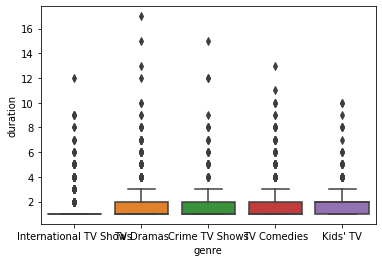

In [45]:
import seaborn as sns
sns.boxplot(data=df_tvd,x='genre',y='duration')

In [50]:
df_movd=df_na[(df_na['type']=='Movie')&(df_na['genre'].isin(['International Movies','Dramas','Documentaries','Independent Movies',"Comedies"	]))][['title','rating','duration','genre']]
df_movd.drop_duplicates(keep='first',inplace=True)
df_movd['duration']=df_movd['duration'].str.split(expand=True)[0]
df_movd['duration']=df_movd['duration'].apply(lambda x:int(x))
df_movd

,title,rating,duration,genre
0,Dick Johnson Is Dead,PG-13,90,Documentaries
7,Sankofa,TV-MA,125,Dramas
7,Sankofa,TV-MA,125,Independent Movies
7,Sankofa,TV-MA,125,International Movies
9,The Starling,PG-13,104,Comedies
...,...,...,...,...
8802,Zodiac,R,158,Dramas
8804,Zombieland,R,88,Comedies
8805,Zoom,PG,88,Comedies
8806,Zubaan,TV-14,111,Dramas


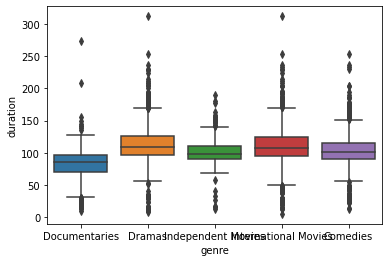

In [52]:
sns.boxplot(data=df_movd,x='genre',y='duration')

In [ ]:
#Recommendation 5
#From these insights we can choose the average duration of content for the recommended genres.